## Aprendizaje No Supervisado 

## Importación de Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import io

## Lectura del dataset

In [2]:
df=pd.read_csv("data.csv")
df.head(4)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   93.0        94.0         87.0         96.0          91.0         86.0   
1   81.0        76.0         77.0         94.0          89.0         91.0   
2   88.0        87.0         78.0         95.0          94.0         90.0   
3   21.0        19.0         51.0         42.0          57.0         58.0   

   Agil

In [3]:
df.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number      Crossing     Finishing  HeadingAccuracy  \
count   18147.000000  18159.000000  18159.000000     18159.000000   
mean       19.546096     49.734181     45.550911        52.298144   
std        15.947765     18.364524     19.525820        17.379909   
min         1.000000      5.000000      2.000000         4.000000   
25%         8.000000     38.000000     30.000000        44.000000   
50%        17.000000     54.000000     49.000000        56.000000   
75%        26.000000     64.000000     62.000000        64.000000   
max        99.000000     93.000000     95.000000        94.000000   

       ShortPassing       Volleys     Dribbling         Curve    FKAccuracy  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.686712     42.909026     55.371001     47.170824     42.863153   
std       14.699495     17.694408     18.910371     18.395264     17.478763   
min        7.000000      4.000000      4.000000      6.000000      3.000000   
25%       54.000000     30.000000     49.000000     34.000000     31.000000   
50%       62.000000     44.000000     61.000000     48.000000     41.000000   
75%       68.000000     57.000000     68.000000     62.000000     57.000000   
max       93.000000     90.000000     97.000000     94.000000     94.000000   

        LongPassing   BallControl  Acceleration   SprintSpeed       Agility  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      52.711933     58.369459     64.614076     64.726967     63.503607   
std       15.327870     16.686595     14.927780     14.649953     14.766049   
min        9.000000      5.000000     12.000000     12.000000     14.000000   
25%       43.000000     54.000000     57.000000     57.000000     55.000000   
50%       56.000000     63.000000     67.000000     67.000000     66.000000   
75%       64.000000     69.000000     75.000000     75.000000     74.000000   
max       93.000000     96.000000     97.000000     96.000000     96.000000   

          Reactions       Balance     ShotPower       Jumping       Stamina  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      61.836610     63.966573     55.460047     65.089432     63.219946   
std        9.010464     14.136166     17.237958     11.820044     15.894741   
min       21.000000     16.000000      2.000000     15.000000     12.000000   
25%       56.000000     56.000000     45.000000     58.000000     56.000000   
50%       62.000000     66.000000     59.000000     66.000000     66.00000

In [4]:
df.shape

(18207, 89)

## Primera selección de variables de interés

In [5]:
df_n=df

df_n=df_n[(df_n['Overall']>70)]

skills_ratings = ['Position','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

35 variables numéricas de desempeño según habilidad


In [6]:
df_n = df_n[skills_ratings]

In [7]:
df_n.shape

(4749, 35)

In [8]:
df_n.isna().sum()

Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

## Unificación de la variable Position

Agrupamos las diferentes posiciones de los jugadores filtrados, según sean Front, Midfield, Back y Goalkeeper. 

In [9]:
df_n.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [10]:
df_n = df_n.assign(short_position = df_n.Position.replace({
'GK':'goalkeeper',
'LF':'front',
'ST':'front',
'CF':'front',
'RF':'front',
'LS':'front',
'RS':'front',
'LW':'midfield',
'RW':'midfield',
'RM':'midfield',
'LM':'midfield',
'CAM':'midfield',
'CM':'midfield',
'CDM':'midfield',
'RCM':'midfield',
'LAM':'midfield', 
'RDM':'midfield',
'RAM':'midfield',
'LCM':'midfield',
'LDM':'midfield', 
'RB':'back',
'LB':'back',
'RWB':'back',
'LWB':'back',
'CB':'back',
'RCB':'back', 
'LCB':'back'}))

In [11]:
df_n.short_position.unique()

array(['front', 'midfield', 'goalkeeper', 'back'], dtype=object)

## Correlación entre variables

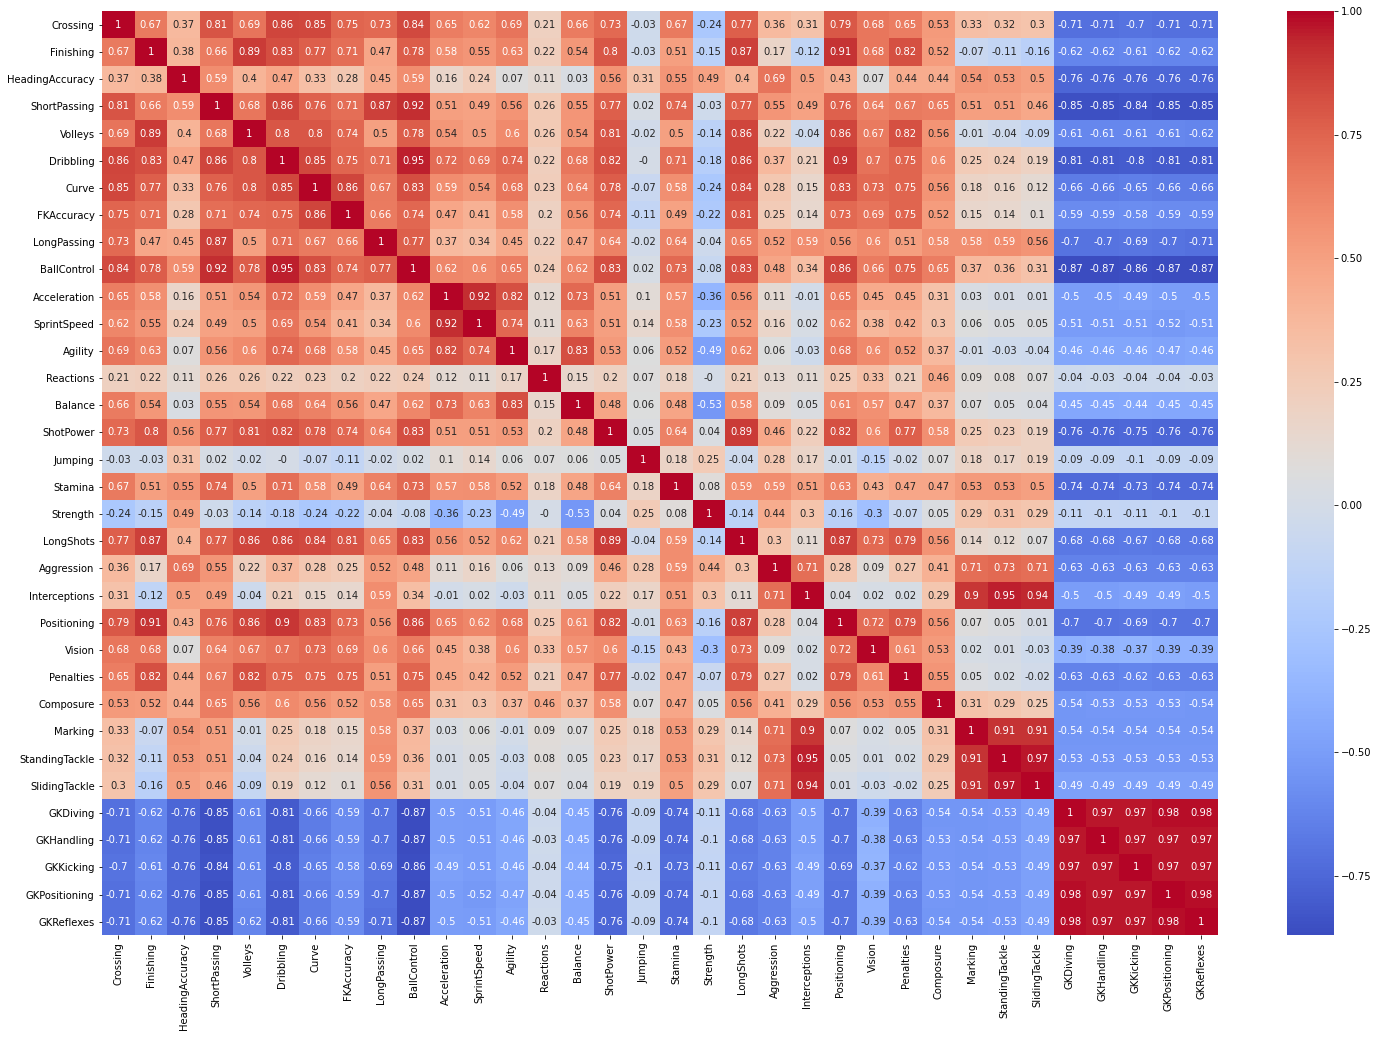

In [12]:
plt.figure(figsize=(25,17))
corr = df_n.corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

Analizamos la correlación entre todas las skills seleccionadas, y decidimos quedarnos con aquellas que tuviesen una correlación menor al 0.75. 

Variables seleccionadas:
- GKDiving
- Composure
- Finishing
- Vision
- Strength
- Stamina
- Jumping
- ShotPower
- Reactions
- Agility
- Dribling
- HeadingAccuracy

In [13]:
df_w_gk = df_n[["short_position",
              "GKDiving",
              "Composure",
              "Finishing",
              "Vision",
              "Strength",
              "Stamina", 
              "Jumping",
              "ShotPower",
              "Reactions",
              "Agility",
              "Dribbling",
              "HeadingAccuracy"]]

In [14]:
df_w_gk.groupby("short_position").agg(("mean", "std", "count"))

GKDiving                  Composure                   \
                     mean       std count       mean        std count   
short_position                                                          
back            10.715152  3.114234  1485  68.521886   6.309330  1485   
front           10.480282  3.196265   710  71.630986   6.933832   710   
goalkeeper      75.673563  4.570907   435  54.289655  11.053859   435   
midfield        10.608306  3.205644  2119  71.645116   6.475899  2119   

                Finishing                      Vision                   \
                     mean        std count       mean        std count   
short_position                                                           
back            41.023569  12.815353  1485  53.422222  12.724646  1485   
front           75.605634   4.989068   710  64.833803   8.930099   710   
goalkeeper      13.213793   3.193137   435  45.521839  12.745157   435   
midfield        63.276546  10.229379  2119  71.783860   6.605682  2119   

                 Strength                     Stamina                   \
                     mean        std count       mean        std count   
short_position                                                           
back            75.200673   9.107630  1485  72.164983  10.364794  1485   
front           74.349296  10.343151   710  69.866197   8.944610   710   
goalkeeper      65.800000   9.620638   435  33.650575   7.113447   435   
midfield        65.245399  11.654257  2119  74.337423   9.659005  2119   

                  Jumping                   ShotPower                   \
                     mean        std count       mean        std count   
short_position                                                           
back            72.387205  10.522225  1485  61.363636  12.808396  1485   
front           71.945070  10.592121   710  75.785915   5.469167   710   
goalkeeper      64.786207  10.242578   435  23.868966   8.361301   435   
midfield        65.414346  12.246412  2119  72.070788   7.693963  2119   

                Reactions                    Agility                   \
                     mean       std count       mean        std count   
short_position                                                          
back            70.942088  5.374331  1485  62.492929  13.147032  1485   
front           72.607042  5.974483   710  70.764789  10.903586   710   
goalkeeper      70.822989  5.611741   435  46.577011  12.082299   435   
midfield        71.933931  5.583631  2119  74.712128   9.961598  2119   

                Dribbling                  HeadingAccuracy                   
                     mean        std count            mean        std count  
short_position                                                               
back            59.824242  12.727052  1485       69.559596   8.644443  1485  
front           72.312676   6.316141   710       71.208451   9.240186   710  
goalkeeper      15.216092   4.118545   435       14.947126   4.348257   435  
midfield        74.022180   6.837931  2119       57.051911  11.348424  2119

## Visualización con variables más diferenciables

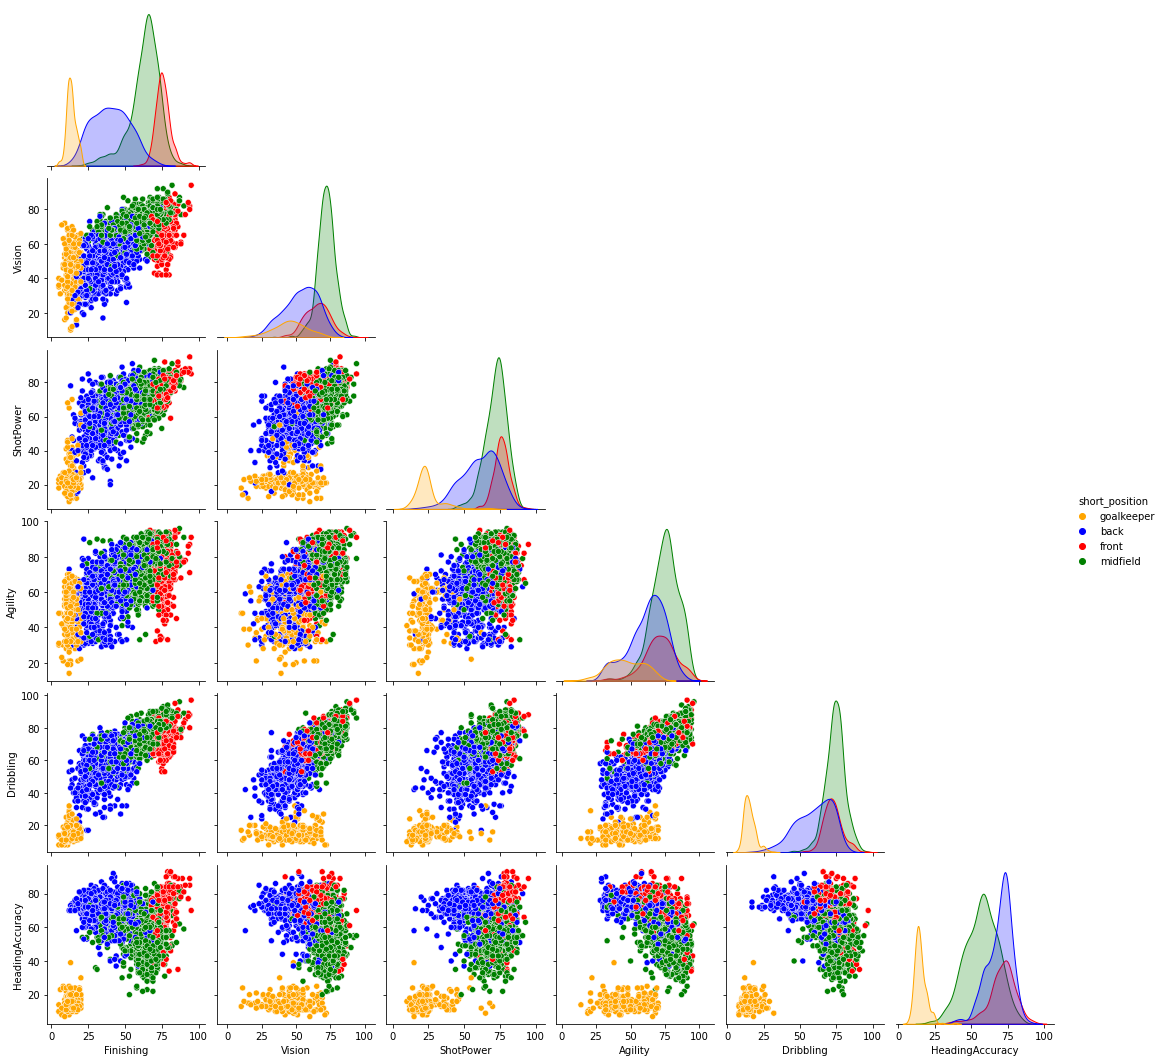

In [15]:
sns.pairplot(data=df_w_gk[[
                 "short_position",
                 "Finishing",
                 "Vision",
                 "ShotPower",
                 "Agility",
                 "Dribbling",
                 "HeadingAccuracy"]].sample(2500),
             hue='short_position',
             corner= True,
             palette= {'front': 'red',
                       'midfield': 'green',
                       'goalkeeper': 'orange',
                       'back': 'blue'})

Se observa en el gráfico que con las variables consideradas, los _Goalkeepers_ se diferencian del resto en todos los casos. 
Las otras posiciones en la mayoría de los gráficos se encuentran superpuestas, siendo las posiciones Front y Mildfield las posiciones más dificil de diferenciar. Particularmente, en el gráfico de _Finnishing_ vs. _HeadingAccuracy_ es donde se observa una mayor diferenciación entre todas las otras posiciones.

## Clustering con Goalkeeper

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### Visualización mediante embeding TSNE

In [17]:
scaler = StandardScaler()
seed = 0

X_sc = df_w_gk.drop(columns="short_position")
X_TSNE = TSNE(n_components=2,
              verbose=1,
              perplexity=30,
              n_iter=1000,
              init='random',
              random_state=seed).fit_transform(X_sc)
short_positions = df_w_gk.short_position

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4749 samples in 0.014s...
[t-SNE] Computed neighbors for 4749 samples in 0.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4749
[t-SNE] Computed conditional probabilities for sample 2000 / 4749
[t-SNE] Computed conditional probabilities for sample 3000 / 4749
[t-SNE] Computed conditional probabilities for sample 4000 / 4749
[t-SNE] Computed conditional probabilities for sample 4749 / 4749
[t-SNE] Mean sigma: 6.268617
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.662521
[t-SNE] KL divergence after 1000 iterations: 1.861439


In [18]:
df_TSNE = pd.DataFrame(X_TSNE).assign(position=short_positions)

<AxesSubplot:title={'center':'TSNE with position'}, xlabel='TSNE 2', ylabel='TSNE 1'>

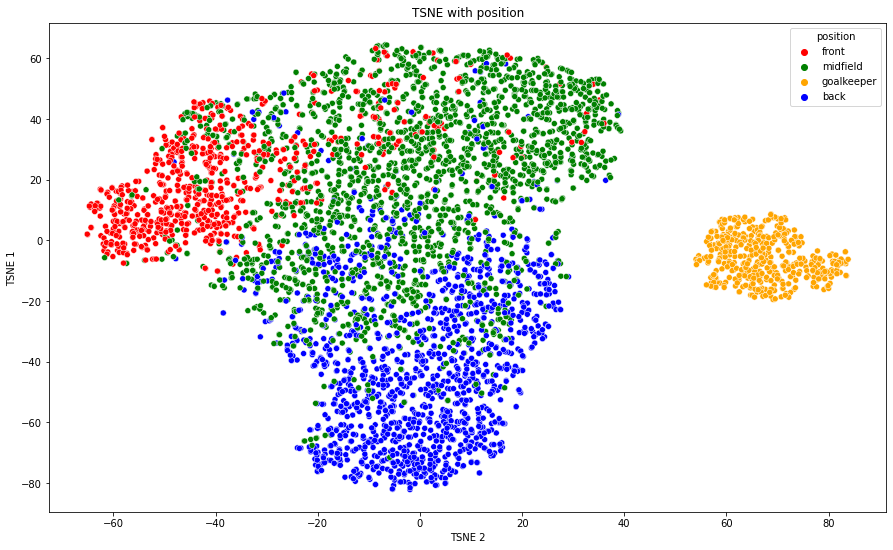

In [19]:
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE with position')
sns.scatterplot(data=df_TSNE,
                x=0,
                y=1,
                palette={'front': 'red',
                         'midfield': 'green',
                         'goalkeeper': 'orange',
                         'back': 'blue'},
                hue='position')

Se vuelve a observar que los _Goalkeeper_ se diferencian del resto de las posiciones. Asimismo, los defensores parecieran estar mas diferenciados de los centrocampistas y los delanteros.

### Clustering KMeans

In [22]:
def plot_cluster_range (X, X_TSNE, range_n_clusters):
    sse ={}
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=seed, n_init = 100 )
        cluster_labels = clusterer.fit_predict(X)
        sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Para n_clusters =", n_clusters,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Visualizacion de los datos.")
        ax1.set_xlabel("espacio de la primera caracteristica")
        ax1.set_ylabel("espacio de la segunda caracteristica")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_TSNE[:, 0], X_TSNE[:, 1]
                    , marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("Visualizacion de los datos.")
        ax2.set_xlabel("espacio de la primera caracteristica")
        ax2.set_ylabel("espacio de la segunda caracteristica")

        plt.suptitle(("Analisis de silueta para Kmedias "
                      "con n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

    plt.show()

Para n_clusters = 3 El silhouette_score promedio es : 0.3574936641330956
Para n_clusters = 4 El silhouette_score promedio es : 0.24368917436098803
Para n_clusters = 5 El silhouette_score promedio es : 0.23091064671960296
Para n_clusters = 6 El silhouette_score promedio es : 0.1998473762512694


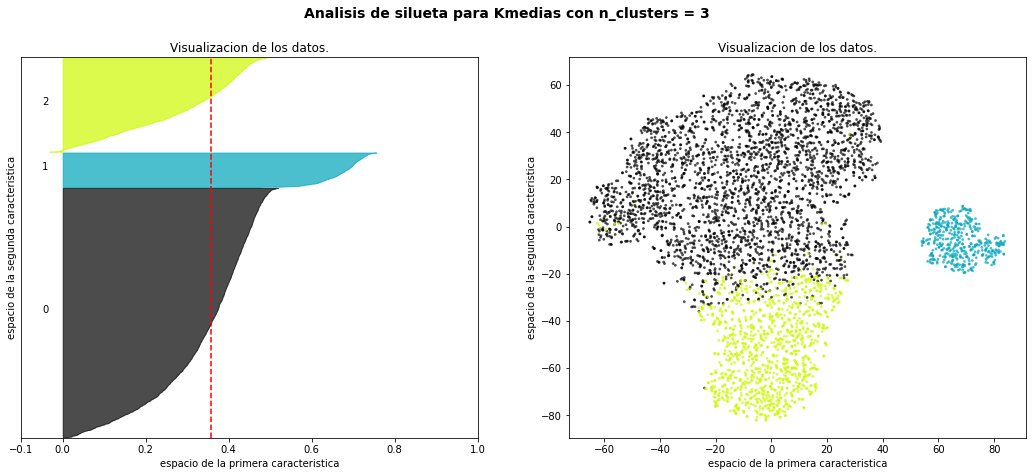

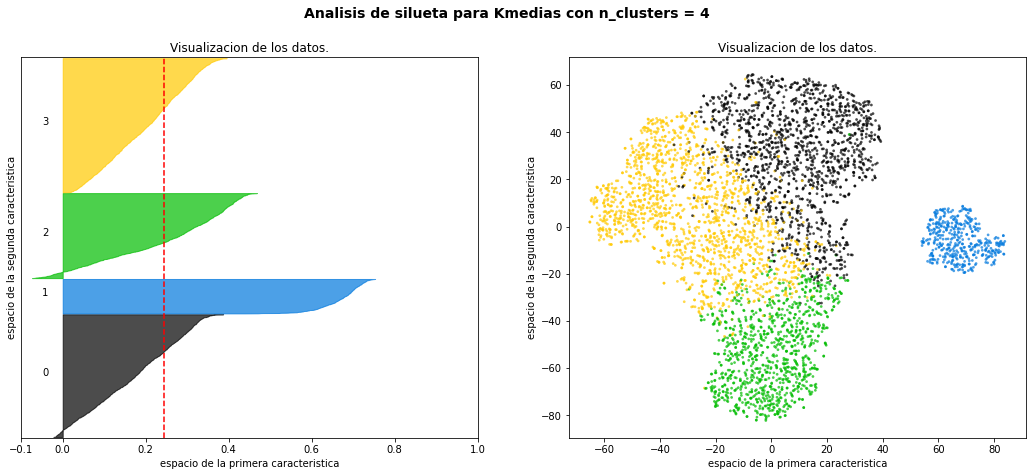

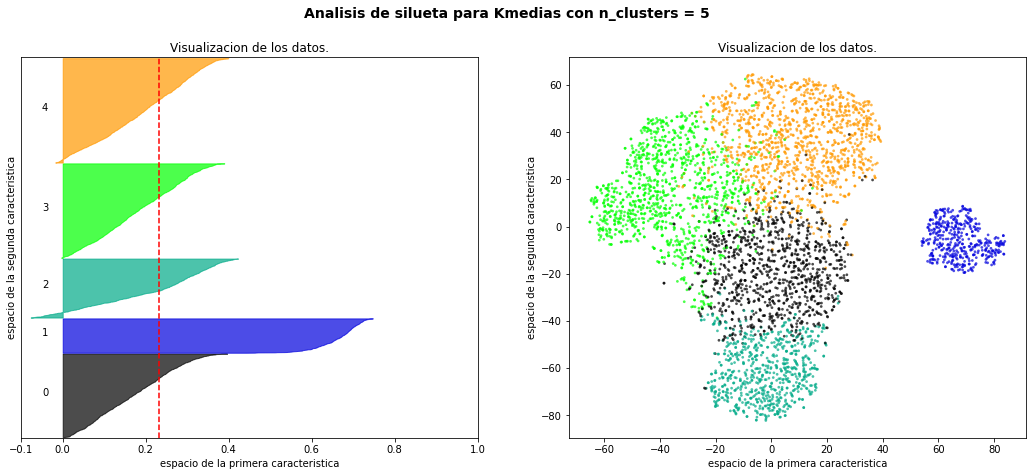

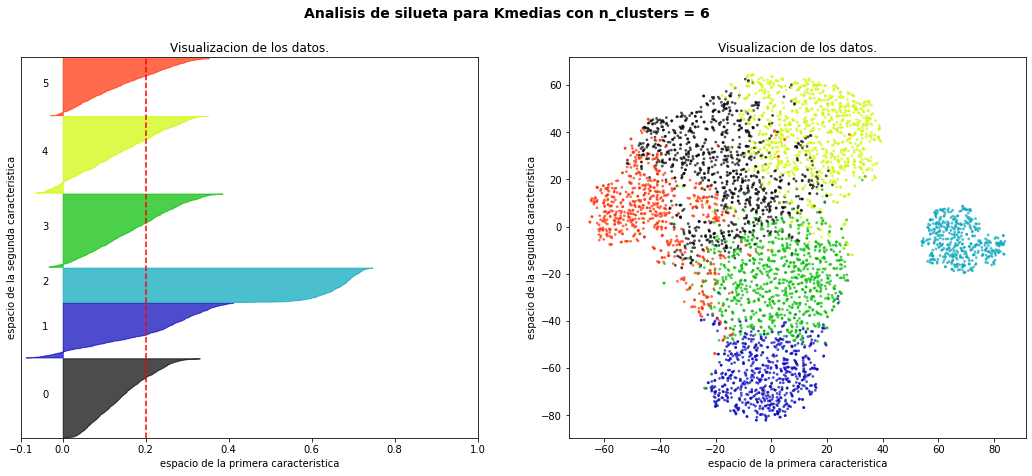

In [23]:
range_n_clusters = [3, 4, 5, 6]
plot_cluster_range(X_sc, X_TSNE, range_n_clusters)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

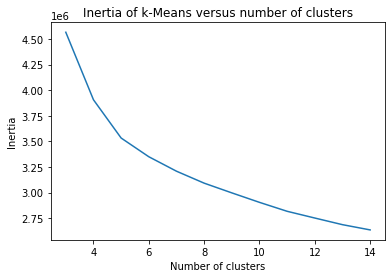

In [24]:
scores = [KMeans(n_clusters=i, random_state = 28).fit(X_sc).inertia_ for i in range(3,15)]

plt.plot(np.arange(3, 15), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Si bien no se observa un quiebre pronunciado en el gráfico del codo, se seleccionó 4 como número de clusters siendo el punto de inflexión en esta gráfica. Además, se tuvo en cuenta el gráfico de silueta asociado a este número de clusters el cual posee la menor cantidad de valores negativos.

#### Número de clusters seleccionado

In [26]:
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=seed)
km.fit(X_sc)

df_w_gk = df_w_gk.assign(kmeans_cluster=km.labels_)

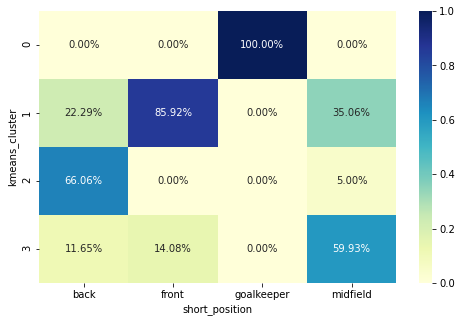

In [27]:
plt.figure(figsize=(8, 5))
exp = pd.crosstab(
    df_w_gk.kmeans_cluster,
    df_w_gk.short_position,
    normalize='columns')
sns.heatmap(exp, annot=True, fmt='.2%', cmap="YlGnBu")
plt.show()

Se observa que el cluster que contiene a los _Goalkeeper_ tiene una completitud de toda la clase a diferencia de los restantes clusters en donde hay heterogeneidad de clases. El cluster número 2 posee la mayoría de los defensores, mientras que el cluster número 1 posee la mayoria de los delanteros. Los centrocampistas están distribuídos entre el cluster número 1 y 3.

<AxesSubplot:xlabel='Dribbling', ylabel='HeadingAccuracy'>

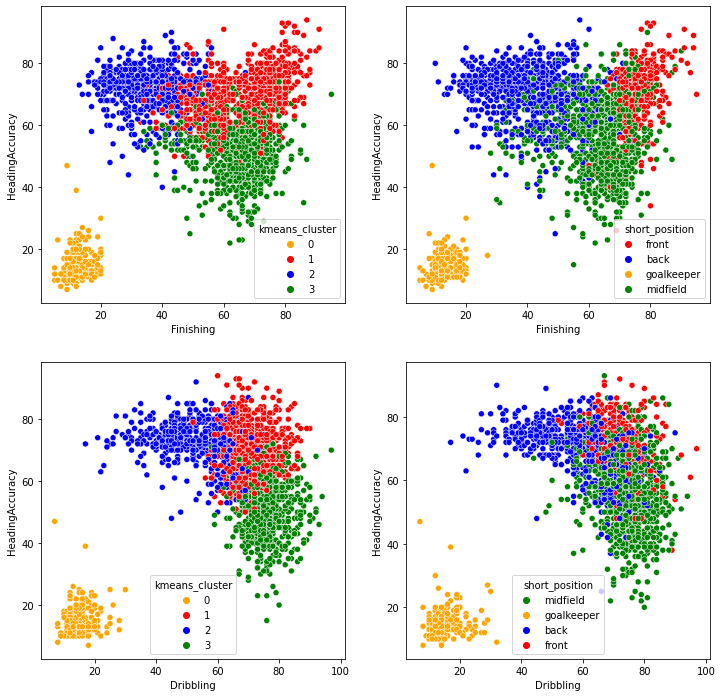

In [28]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=df_w_gk[["kmeans_cluster","Finishing","HeadingAccuracy"]].sample(2500), x="Finishing", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',3: 'green',0: 'orange',2:'blue'}, ax=axes[0][0])
sns.scatterplot(data=df_w_gk[["short_position","Finishing","HeadingAccuracy"]].sample(2500),x="Finishing", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green','goalkeeper': 'orange',
                       'back': 'blue'}, ax=axes[0][1])

sns.scatterplot(data=df_w_gk[["kmeans_cluster","Dribbling","HeadingAccuracy"]].sample(2500), x="Dribbling", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',3: 'green',0: 'orange',2:'blue'}, ax=axes[1][0])
sns.scatterplot(data=df_w_gk[["short_position","Dribbling","HeadingAccuracy"]].sample(2500),x="Dribbling", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green','goalkeeper': 'orange',
                       'back': 'blue'}, ax=axes[1][1])


En esta gráfica podemos observar como el algoritmo de k-means puede encontrar las posiciones de Goalkeeper y Back, sin embargo la posición Front es la menos encontrada. Esto podría deberse a que muchos defensores y mediocampistas suelen tener algunas habilidades que se asemejan a las de la posición delantera. 
Esto también se ve reflejado en los valores bajos de las métricas que calculamos a continuación. 

In [29]:
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score

labels_pred = df_w_gk.kmeans_cluster
labels_true = df_w_gk.short_position

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_sc, labels_pred))

Silhouette Coefficient: 0.244


In [30]:
h, c, v = homogeneity_completeness_v_measure(labels_true, labels_pred)

In [31]:
print("Homogeneity: %0.3f" % h)
print("Completeness: %0.3f" % c)
print("V-measure: %0.3f" % v)

Homogeneity: 0.483
Completeness: 0.459
V-measure: 0.471


### Clustering Mean Shift

Estimated number of clusters: 2
Homogeneity: 0.249
Completeness: 0.994
V-measure: 0.398
Adjusted Rand Index: 0.177
Adjusted Mutual Information: 0.398
Silhouette Coefficient: 0.628


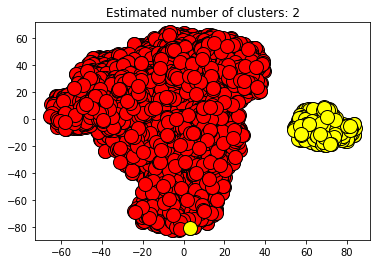

In [32]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_sc, quantile=0.5)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_sc)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_sc, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_TSNE[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
   
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

El análisis de cluster realizado con MeanShift muestra un número de 2 clusters que probablemente se refieran a los _Goalkeepers_ y el resto de las posiciones agrupadas (defensores, mediocampistas y delanteros). 

### Clustering Jerárquico

In [33]:
from sklearn.neighbors import kneighbors_graph
import time

c:\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivi

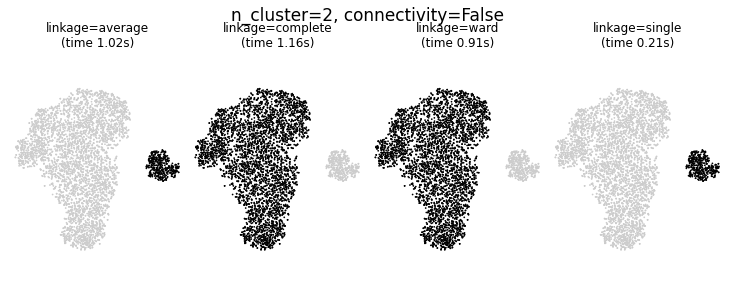

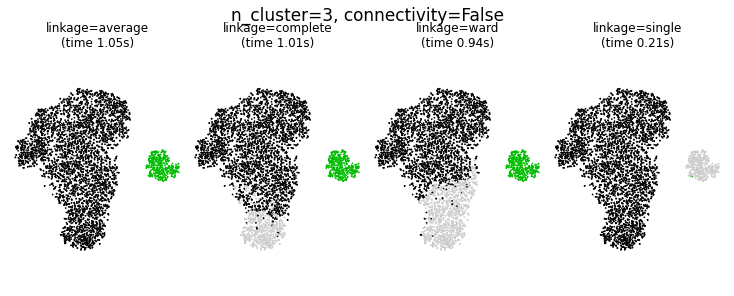

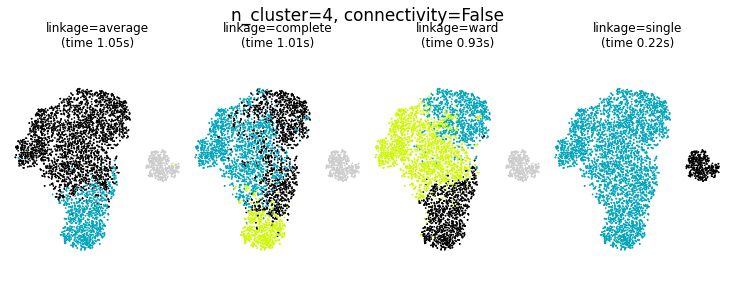

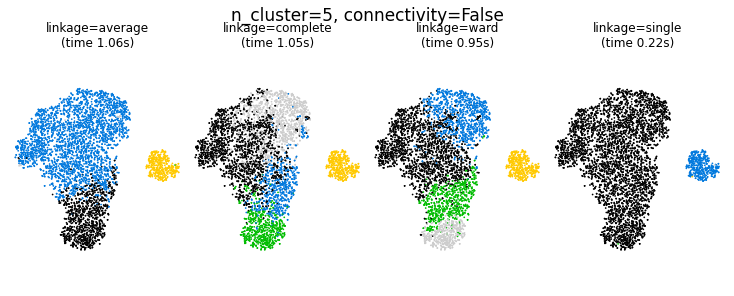

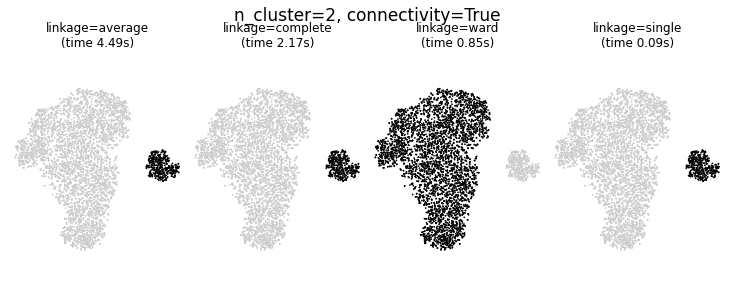

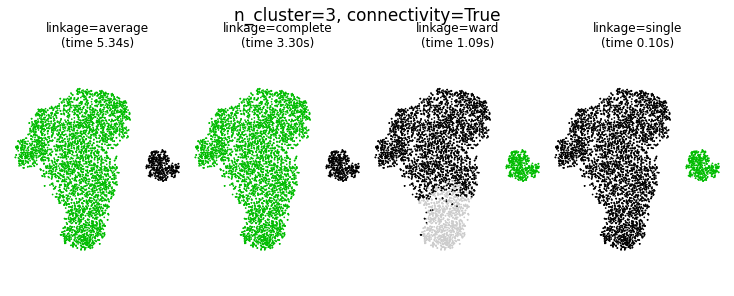

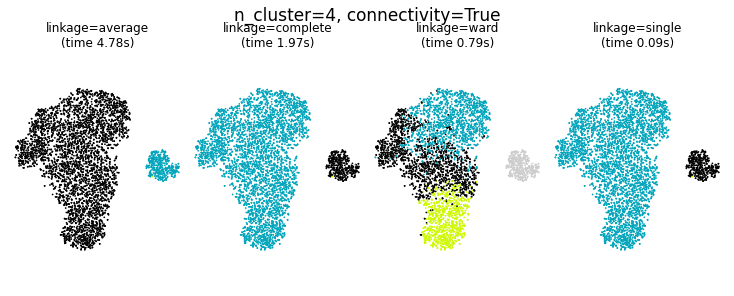

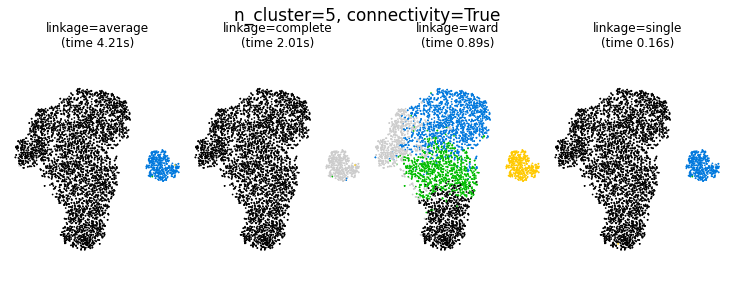

In [34]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X_sc, 10, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X_sc)
            elapsed_time = time.time() - t0
            plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, s=0.5)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )

plt.show()

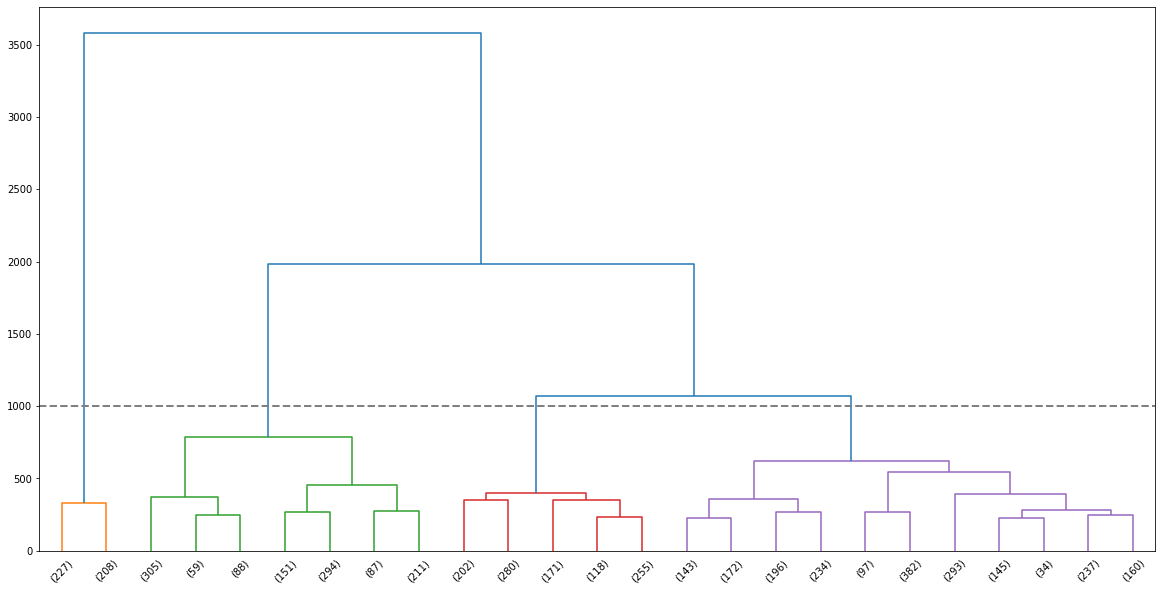

In [55]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X_sc, method='ward'), \
                            truncate_mode='lastp',\
                            p=25,\
                           color_threshold=1000)
plt.axhline(y=1000, c='grey', lw=2, linestyle='dashed')

El resultado del análisis de cluster jerárquico muestra que el método de linkage Ward fue el que mejor logro diferenciar los grupos de jugadores. Esto puede deberse a que éste método suele separar mejor clusters a pesar de tener mas ruido en las observaciones. 
Observando el dendrograma, vemos que el cluster amarillo es el más distinta del resto, siendo los cluster rojo y violeta los más cercanos entre sí. 

## Clustering sin Goalkeeper

### Visualización mediante embeding TSNE

In [58]:
scaler = StandardScaler()
seed = 0

df_wout_gk= df_w_gk[df_w_gk.short_position!= "goalkeeper"].reset_index(drop=True)

X = df_wout_gk.drop(columns=["short_position", "GKDiving"])

X_sc_wout_gk = scaler.fit_transform(X)
X_TSNE = TSNE(n_components=2,
              verbose=1,
              perplexity=30,
              n_iter=1000,
              init='random',
              random_state=seed).fit_transform(X_sc_wout_gk)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4314 samples in 0.012s...
[t-SNE] Computed neighbors for 4314 samples in 0.599s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4314
[t-SNE] Computed conditional probabilities for sample 2000 / 4314
[t-SNE] Computed conditional probabilities for sample 3000 / 4314
[t-SNE] Computed conditional probabilities for sample 4000 / 4314
[t-SNE] Computed conditional probabilities for sample 4314 / 4314
[t-SNE] Mean sigma: 0.758673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.896660
[t-SNE] KL divergence after 1000 iterations: 1.789057


In [59]:
df_TSNE = pd.DataFrame(X_TSNE).assign(position=df_wout_gk.short_position)

<AxesSubplot:title={'center':'TSNE with position'}, xlabel='TSNE 2', ylabel='TSNE 1'>

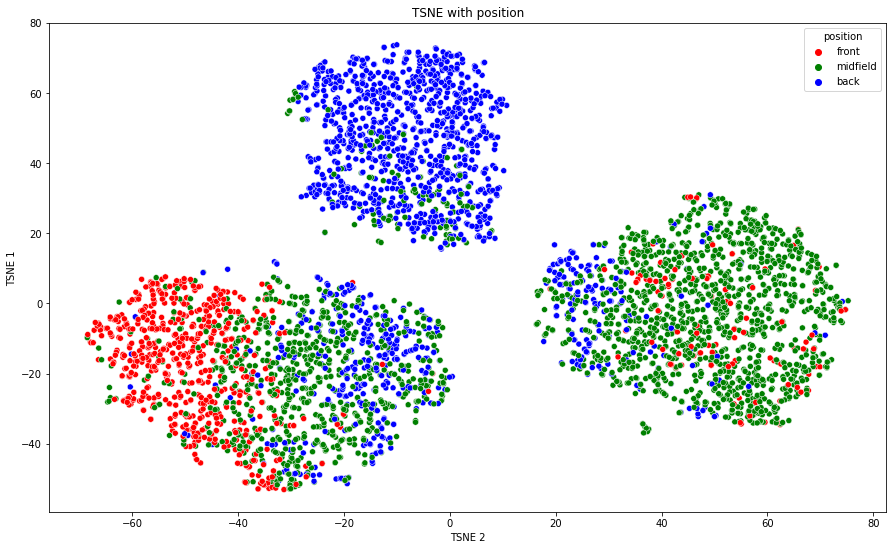

In [60]:
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE with position')
sns.scatterplot(data=df_TSNE,
                x=0,
                y=1,
                palette={'front': 'red',
                         'midfield': 'green',
                         'back': 'blue'},
                hue='position')

Observamos que los defensores se encuentran en su mayoría en el conjunto de puntos superior, los mediocampistas en el conjunto que se encuentra en la derecha y los delanteros casi exclusivamente en la zona izquierda. 

### Clustering KMeans

Para n_clusters = 2 El silhouette_score promedio es : 0.24931893146392967
Para n_clusters = 3 El silhouette_score promedio es : 0.25592834872953363
Para n_clusters = 4 El silhouette_score promedio es : 0.18544192601533868
Para n_clusters = 5 El silhouette_score promedio es : 0.1561560691797925
Para n_clusters = 6 El silhouette_score promedio es : 0.15020335147045213


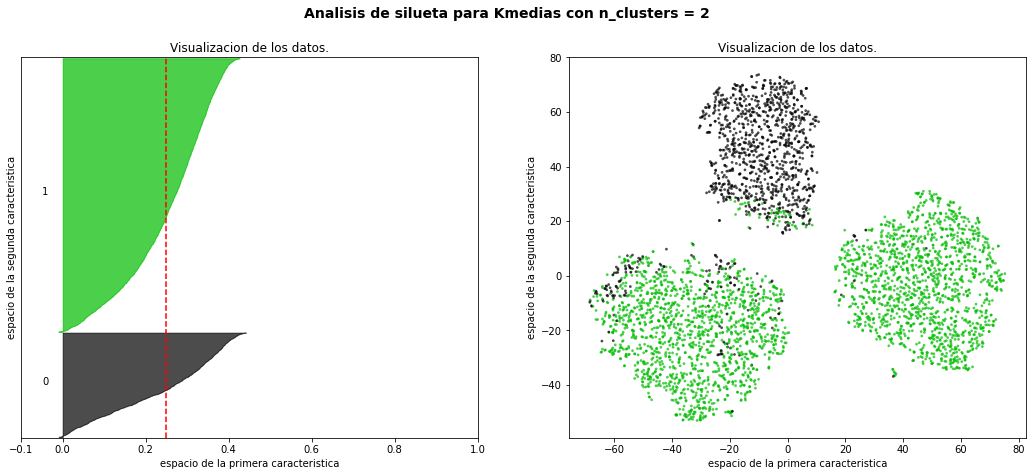

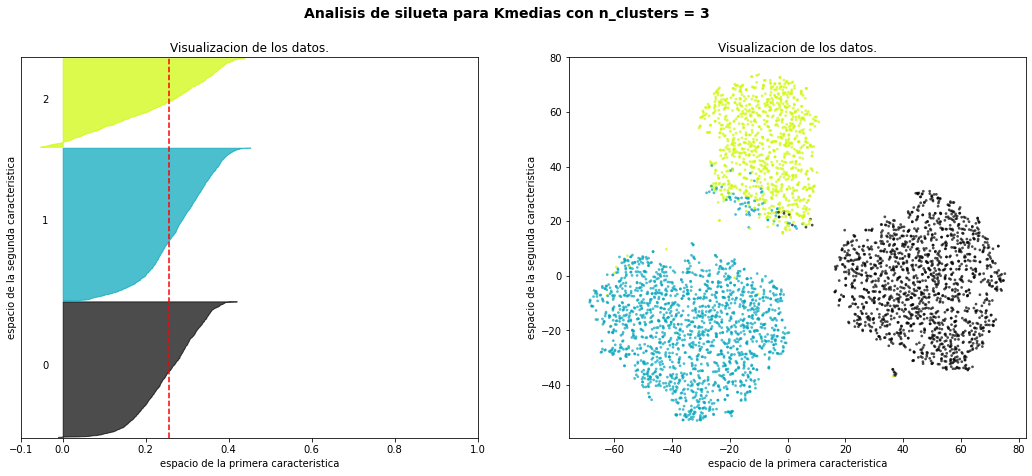

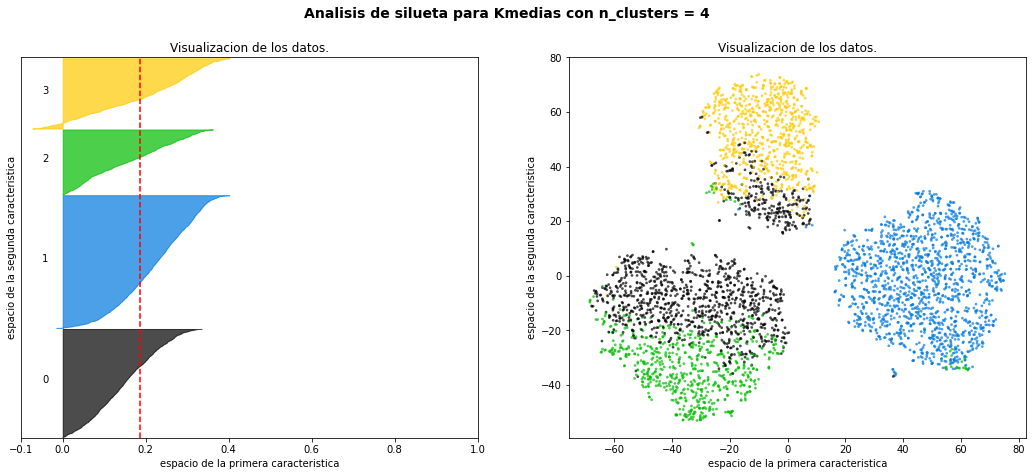

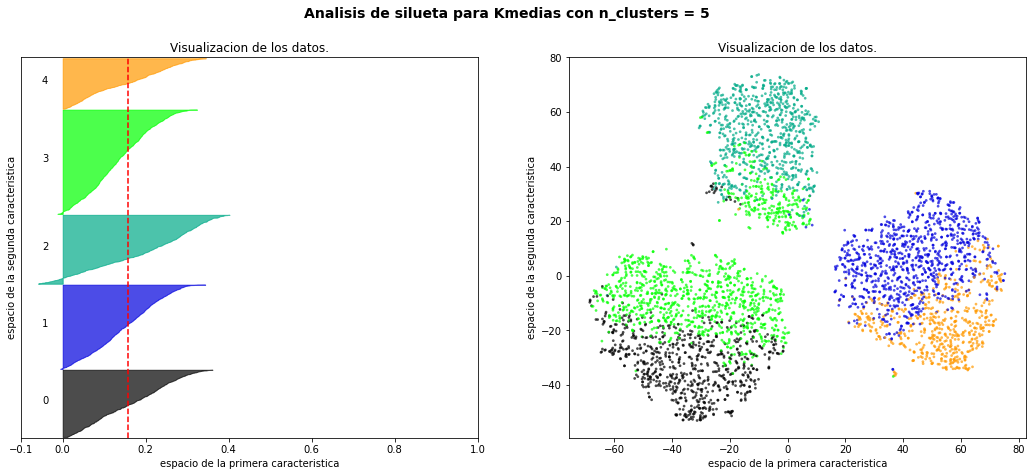

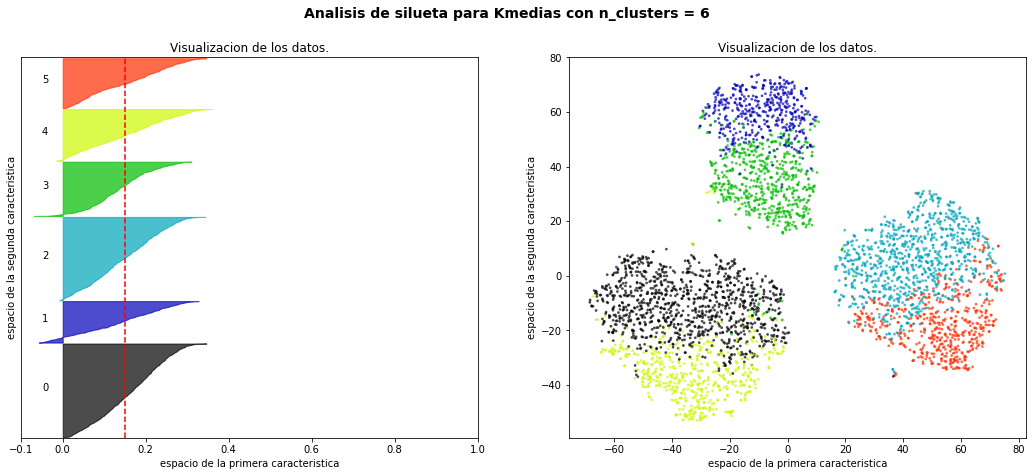

In [61]:
range_n_clusters = [2, 3, 4, 5, 6]
plot_cluster_range(X_sc_wout_gk, X_TSNE, range_n_clusters)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

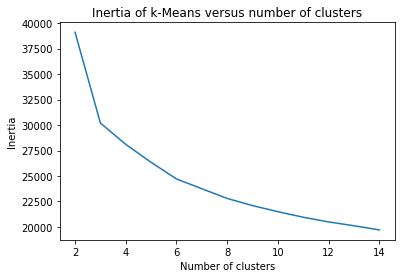

In [62]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i, random_state = seed).fit(X_sc_wout_gk).inertia_ for i in range(2,15)]

plt.plot(np.arange(2, 15), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Observamos un punto de inflexión para el nivel de clusters 3.

#### Número de clusters seleccionado

In [65]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=seed)
km.fit(X_sc_wout_gk)

df_wout_gk = df_wout_gk.assign(kmeans_cluster=km.labels_)

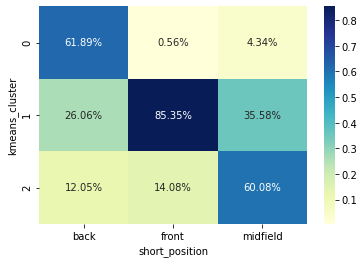

In [66]:
exp = pd.crosstab(
    df_wout_gk.kmeans_cluster,
    df_wout_gk.short_position,
    normalize='columns')
sns.heatmap(exp, annot=True, fmt='.2%', cmap="YlGnBu")
plt.show()

Observamos que la posición delanteros está en su mayoría en el cluster 1, la posición de defensores en su mayoría en el cluster 0 y la posición mediocampistas está en su mayoría en el cluster 2. Tanto los defensores como los mediocampistas se encuentran más repartidos entre los diferentes clusters, lo cual explica las métrica bajas que calculamos a continuación. 
También podemos concluir que los menores valores de estas métricas se pueden deber al hecho de haber sacado a los arqueros en la búsqueda de clusters.  

In [67]:
labels_pred = df_wout_gk.kmeans_cluster
labels_true = df_wout_gk.short_position

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_sc_wout_gk, labels_pred))

Silhouette Coefficient: 0.256


In [68]:
h, c, v = homogeneity_completeness_v_measure(labels_true, labels_pred)

In [69]:
print("Homogeneity: %0.3f" % h)
print("Completeness: %0.3f" % c)
print("V-measure: %0.3f" % v)

Homogeneity: 0.289
Completeness: 0.273
V-measure: 0.281


<AxesSubplot:xlabel='Dribbling', ylabel='HeadingAccuracy'>

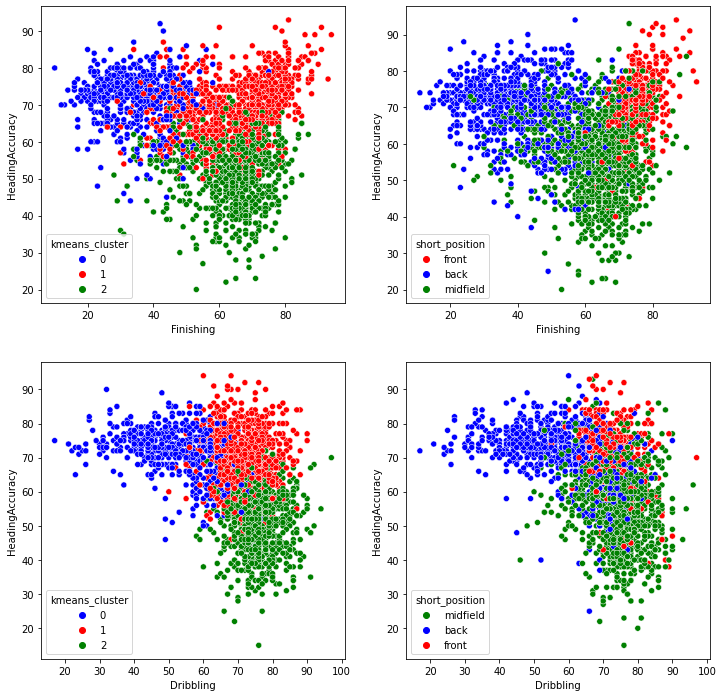

In [74]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=df_wout_gk[["kmeans_cluster","Finishing","HeadingAccuracy"]].sample(2500), x="Finishing", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',2: 'green',0: 'blue'}, ax=axes[0][0])
sns.scatterplot(data=df_wout_gk[["short_position","Finishing","HeadingAccuracy"]].sample(2500),x="Finishing", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green',
                       'back': 'blue'}, ax=axes[0][1])

sns.scatterplot(data=df_wout_gk[["kmeans_cluster","Dribbling","HeadingAccuracy"]].sample(2500), x="Dribbling", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',2: 'green',0: 'blue'}, ax=axes[1][0])
sns.scatterplot(data=df_wout_gk[["short_position","Dribbling","HeadingAccuracy"]].sample(2500),x="Dribbling", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green',
                       'back': 'blue'}, ax=axes[1][1])

### Clustering Mean Shift

Estimated number of clusters: 6
Homogeneity: 0.145
Completeness: 0.154
V-measure: 0.149
Adjusted Rand Index: 0.103
Adjusted Mutual Information: 0.148


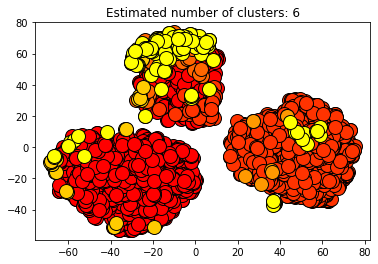

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_sc_wout_gk, quantile=0.05)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_sc_wout_gk)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X_sc_wout_gk, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_TSNE[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
   
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Observamos que los clusters encontrados tienen métricas muy bajas métricas, por lo cuál podemos decir que los otros métodos son mejores para este conjunto de datos. 

### Clustering Jerárquico

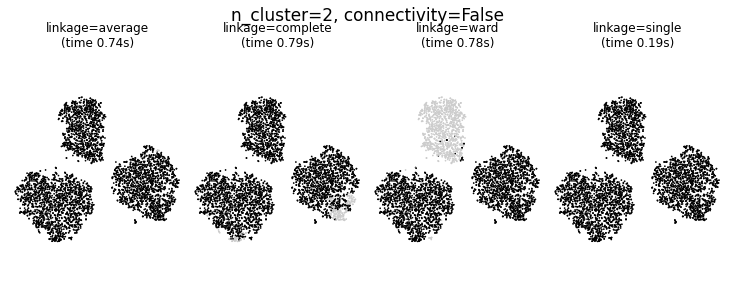

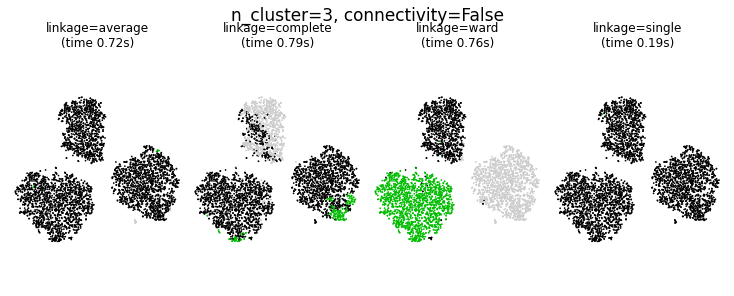

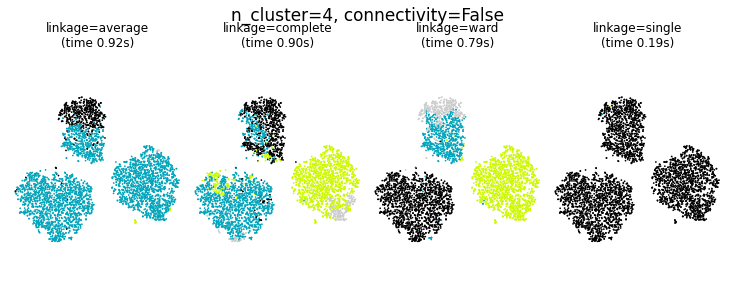

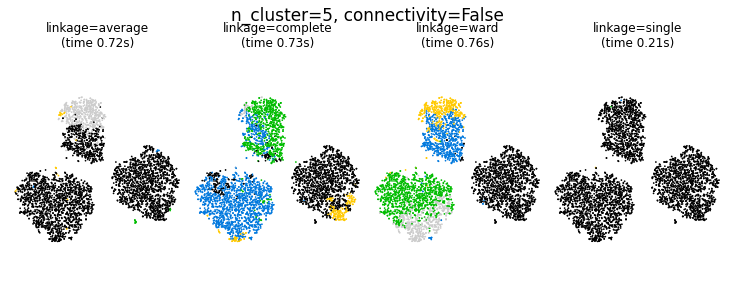

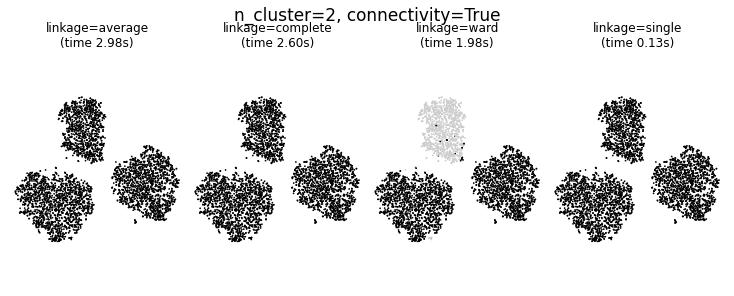

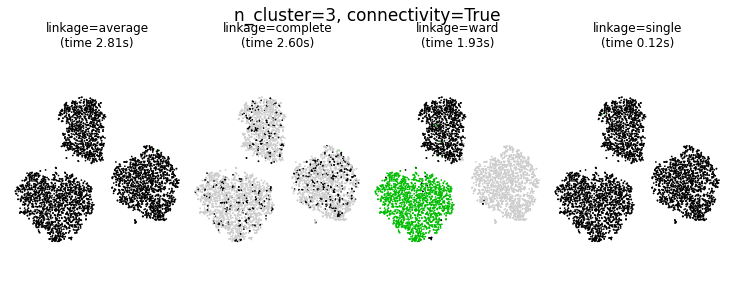

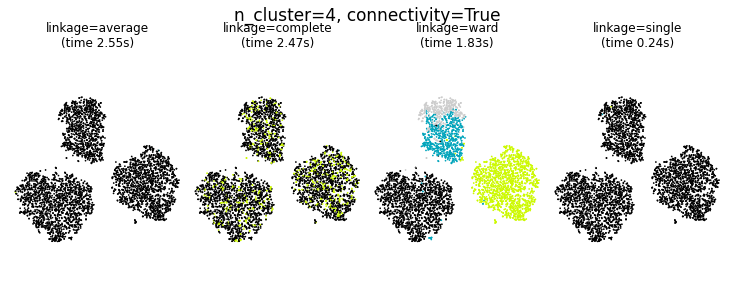

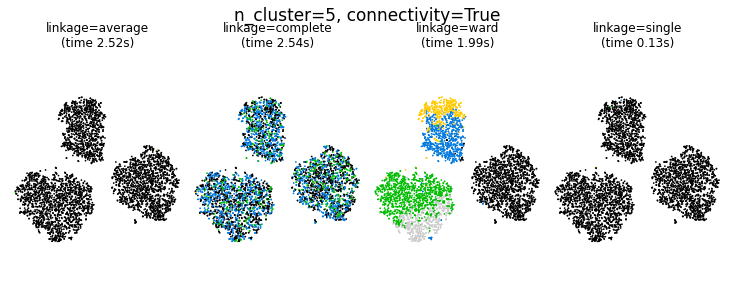

In [72]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X_sc_wout_gk, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X_sc_wout_gk)
            elapsed_time = time.time() - t0
            plt.scatter(X_TSNE [:, 0], X_TSNE [:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, s=0.5)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )

plt.show()

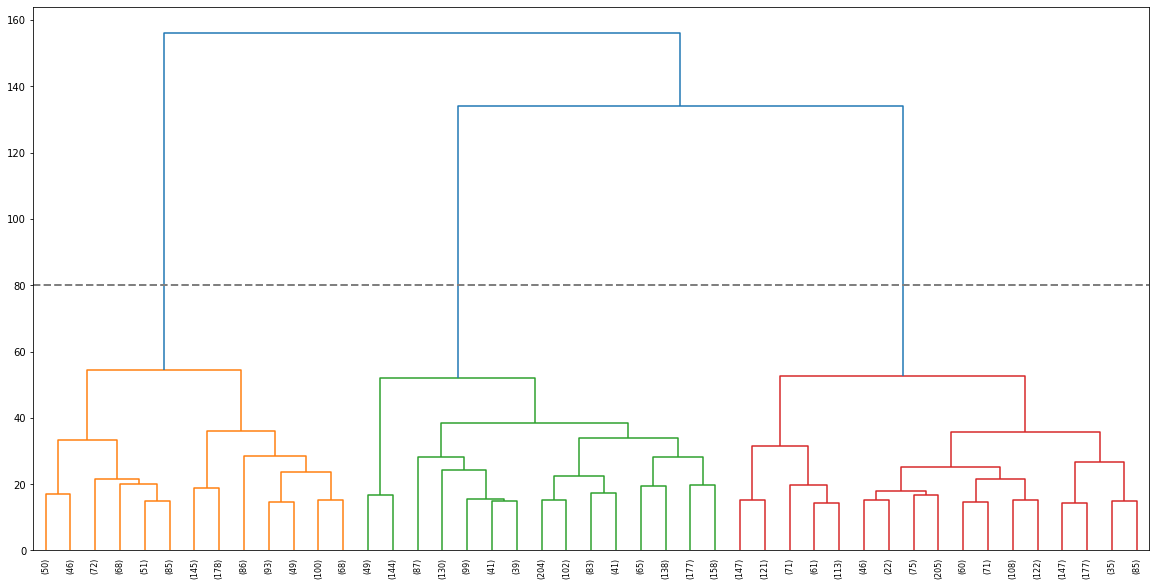

In [75]:
plt.figure(figsize=(20, 10))
dendrogram_wout_gk = sch.dendrogram(sch.linkage(X_sc_wout_gk, method='ward'), \
                            truncate_mode='lastp',\
                            p=45,\
                           color_threshold=80)
plt.axhline(y=80, c='grey', lw=2, linestyle='dashed')

De manera similar a los clustering con arqueros, el resultado del análisis de cluster jerárquico muestra que el método de linkage Ward fue el que mejor logro diferenciar los grupos de jugadores. 
Observando el dendrograma, vemos que la distancia de los 4 grupos formados es más chica que en los clustering anteriores, lo cual puede deberse a que las propias habilidades de los jugadores eran más similares entre si. 

## Conclusiones

Podemos concluir que según las habilidades elegidas, para ambos conjuntos de datos el mejor método de clustering fue el cluster jerarquico. 
Obtuvimos mejores resultados escalando los datos para el conjunto sin arqueros, a pesar de que las variables se encontraran en la misma unidad de medida. Esto puede deberse a que estas posiciones compartian valores más similares en las habilidades seleccionados. Para el conjunto de datos con arqueros, los resultados fueron iguales escalando y no escalando los datos. 